<a href="https://colab.research.google.com/github/sunmarknatecom/colaboratory/blob/master/lung_separation3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install pydicom


     |████████████████████████████████| 35.1MB 100kB/s 


In [0]:
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [0]:
def create_dataset(a, b, c, d):
    df_list = []
    for i in range(c): # c
        path = "./drive/My Drive/dataset/" + d
        fn = "/IM-0001-0%03d.dcm" %(i+1)
        filename = path + fn
        ds = pydicom.dcmread(filename)
        df = ds.pixel_array
        df_3_ch = cv2.merge([df, df, df])
        # df_nor = (df_3_ch - np.min(df))/(np.max(df)-np.min(df))
        df_nor_array = df_3_ch.astype('float64')
        df_list.append(df_nor_array)
    df_array = np.array(df_list)
    x_train = df_array.reshape(df_array.shape[0], 512, 512, 3).astype('float64')
    y_train = np.zeros((c), dtype=int) # c
    for i in range(a-1, b): # a+1, b
        y_train[i] = 1

    return x_train, y_train

In [0]:
x_train_1, y_train_1 = create_dataset(71,128,275,"pt01")
x_train_2, y_train_2 = create_dataset(69,130,263,"pt02")
x_train_3, y_train_3 = create_dataset(1,213,262,"pt04")
x_test, y_test = create_dataset(71,144,285,"pt03")

In [0]:
y_train_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
np.shape(y_train_3)

(262,)

In [0]:
for i in range(213):
    y_train_3[i] = 0
for i in range(49):
    y_train_3[i+213] = 1

In [0]:
y_train_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
# data preparation
# import pydicom
# import matplotlib.pyplot as plt
# ds_list = []
# for i in range(782):
#     fn = pydicom.dcmread("000%03d.dcm" %i)
#     ds = fn.pixel_array
#     plt.imshow(ds, interpolation='bicubic', cmap='Greys')
#     plt.title("%03d" %i)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()

# 01 71-128 275 (lung not_lung)
# 02 69-130 263 (lung not_lung)
# 03 71-144 285 (lung not_lung)
# 04 1-213(not lung) 263 (lung)

In [0]:
x_train = np.concatenate((x_train_1, x_train_2), axis=0)
x_train = np.concatenate((x_train_3, x_train), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)
y_train = np.concatenate((y_train_3, y_train), axis=0)

In [0]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 508, 508, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 254, 254, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 250, 250, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 128)     0         
_________________________________________

In [0]:
from tensorflow.keras import optimizers

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=15)

Train on 800 samples, validate on 285 samples
Epoch 1/20
800/800 [==============================] - 45s 56ms/sample - loss: 1.3355 - acc: 0.7862 - val_loss: 0.2413 - val_acc: 0.8982
Epoch 2/20
800/800 [==============================] - 33s 41ms/sample - loss: 0.1875 - acc: 0.9375 - val_loss: 0.0686 - val_acc: 0.9684
Epoch 3/20
800/800 [==============================] - 33s 41ms/sample - loss: 0.1263 - acc: 0.9650 - val_loss: 0.3345 - val_acc: 0.9193
Epoch 4/20
800/800 [==============================] - 33s 41ms/sample - loss: 0.0820 - acc: 0.9762 - val_loss: 0.2439 - val_acc: 0.9368
Epoch 5/20
800/800 [==============================] - 33s 41ms/sample - loss: 0.0791 - acc: 0.9737 - val_loss: 0.0914 - val_acc: 0.9579
Epoch 6/20
800/800 [==============================] - 33s 41ms/sample - loss: 0.0736 - acc: 0.9725 - val_loss: 0.3009 - val_acc: 0.9544
Epoch 7/20
800/800 [==============================] - 33s 41ms/sample - loss: 0.0959 - acc: 0.9737 - val_loss: 0.1239 - val_acc: 0.9544
Ep

In [0]:
x_train[170]

array([[[-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        ...,
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.]],

       [[-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        ...,
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.]],

       [[-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        ...,
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.]],

       ...,

       [[-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        ...,
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.]],

       [[-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        .

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


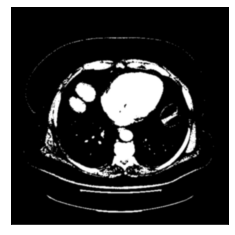

In [0]:
plt.imshow(x_train[220], interpolation='bicubic', cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
np.save("./drive/My Drive/dataset/x_train.npz", x_train)

In [0]:
np.save("./drive/My Drive/dataset/y_train.npz", y_train)

In [0]:
np.save("./drive/My Drive/dataset/x_test.npz", x_test)

In [0]:
np.save("./drive/My Drive/dataset/y_test.npz", y_test)

In [0]:
x_train[220]

array([[[-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        ...,
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.]],

       [[-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        ...,
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.]],

       [[-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        ...,
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.]],

       ...,

       [[-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        ...,
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.]],

       [[-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        [-2048., -2048., -2048.],
        .

In [0]:
model.evaluate(x_test, y_test)

285/285 [==============================] - 9s 31ms/sample - loss: 0.0773 - acc: 0.9719


[0.07732065713932945, 0.97192985]

In [0]:
val_data = cv2.merge([x_train[250], x_train[250], x_train[250]])

In [0]:
model.predict(val_data.reshape(3, 512, 512, 3))

array([[0.6101516 ],
       [0.5996798 ],
       [0.59599227]], dtype=float32)

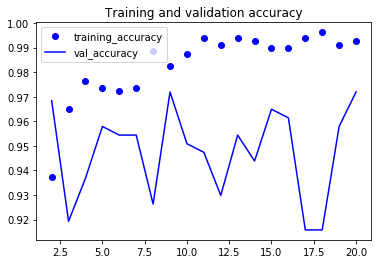

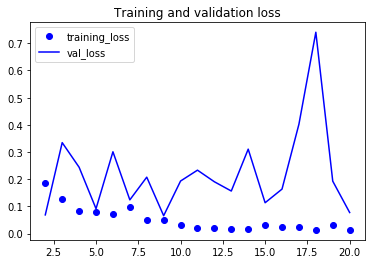

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_n = range(2,len(acc)+1)

plt.plot(epochs_n, acc[1:], 'bo', label='training_accuracy')
plt.plot(epochs_n, val_acc[1:], 'b', label='val_accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs_n, loss[1:], 'bo', label='training_loss')
plt.plot(epochs_n, val_loss[1:], 'b', label='val_loss')
plt.legend()
plt.title('Training and validation loss')
plt.show()

In [0]:
model.save('./drive/My Drive/lung_separation_2.h5')

In [0]:
import os
os.getcwd()

'/content'

In [0]:
from tensorflow.keras.models import load_model
import tensorflow as tf

In [0]:
model = load_model('./drive/My Drive/dataset/lung_separation_2.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.predict(x_train[252].reshape(1, 512, 512, 3))

array([[0.998004]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


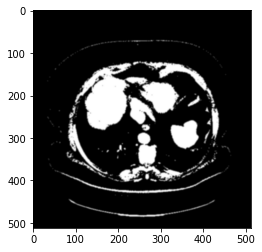

In [0]:
plt.imshow(x_train[252].reshape(512,512,3), interpolation='bicubic', cmap='Greys')
plt.show()

In [0]:
from tensorflow.keras.preprocessing import image
img = x_train[252]
img = img.reshape(1, 512, 512, 3)

In [0]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import backend as K
import cv2

img = img.reshape(512, 512,3)
# img_cv2 = cv2.merge([img, img, img])
# img_nor = preprocess_input(img_cv2)
np.shape(img)

Using TensorFlow backend.


(512, 512, 3)

In [0]:
lung_output = model.output[:,0]

In [0]:
tf.Session.run(lung_output)

TypeError: ignored

In [0]:
last_conv_layer = model.get_layer('conv2d_12')

In [0]:
grads = K.gradients(lung_output, last_conv_layer.output)[0]

In [0]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))

In [0]:
pooled_grads

<tf.Tensor 'Mean:0' shape=(512,) dtype=float32>

In [0]:
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output])

In [0]:
iterate

In [0]:
b, g, r = cv2.split(img_nor)
np.shape(b)
img_single_channel = b.reshape(1, 512, 512,1)

In [0]:
np.shape(b)

(512, 512)

In [0]:
np.shape(img_single_channel)

(1, 512, 512, 1)

In [0]:
pooled_grads_value, conv_layer_output_value = iterate([img])

FailedPreconditionError: ignored

In [0]:
b, g, r = cv2.split(img_nor)
np.shape(b)
img_single_channel = b.reshape(1, 512, 512,1)
# b, g, r = cv2.split(img_nor)

In [0]:
preds = model.predict(img_single_channel)
preds

array([[0.9937489]], dtype=float32)

In [0]:
preds[0]

array([0.9937489], dtype=float32)

In [0]:
lung_output = model.output[:,0]
lung_output

<tf.Tensor 'strided_slice_7:0' shape=(?,) dtype=float32>

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 510, 510, 64)      640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 508, 508, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 254, 254, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 252, 252, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 250, 250, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 125, 125, 128)     0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 123, 123, 256)    

In [0]:
last_conv_layer = model.get_layer('conv2d_12')

In [0]:
grads = K.gradients(lung_output, last_conv_layer.output)[0]

In [0]:
pooled_grads = K.mean(grads, axis=(0))

In [0]:
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

In [0]:
pooled_grads_value, conv_layer_output_value = iterate([img])

FailedPreconditionError: ignored

In [0]:
pooled_grads_value = np.reshape

(20, 20, 512)

In [0]:
np.shape(conv_layer_output_value)

(20, 20, 512)

In [0]:
for i in range(512):
    conv_layer_output_value[:,:,i] = pooled_grads_value[i]

ValueError: ignored

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

In [0]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]

In [0]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
img_tensor = img_tensor.reshape(512, 512, 3)

In [0]:
r, g, b = cv2.split(img_tensor)


In [0]:
new_img_tensor = r.reshape(1, 512, 512, 1)

In [0]:
activations = activation_model.predict(new_img_tensor)

In [0]:
first_layer_activation = activations[0]

In [0]:
np.shape(first_layer_activation)

(1, 510, 510, 64)

([], <a list of 0 Text yticklabel objects>)

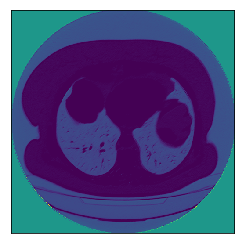

In [0]:
plt.matshow(first_layer_activation[0,:,:,43], cmap='viridis')
plt.xticks([])
plt.yticks([])

In [0]:
second_layer_activation = activations[1]

In [0]:
np.shape(second_layer_activation)

(1, 508, 508, 64)

([], <a list of 0 Text yticklabel objects>)

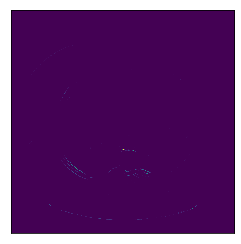

In [0]:
plt.matshow(second_layer_activation[0,:,:,14], cmap='viridis')
plt.xticks([])
plt.yticks([])

In [0]:
len(activations)

8

In [0]:
eighth_layer_activation  = activations[7]

In [0]:
np.shape(eighth_layer_activation)

(1, 121, 121, 256)

([], <a list of 0 Text yticklabel objects>)

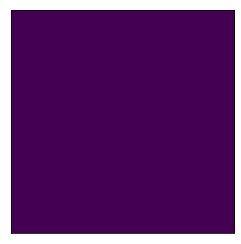

In [0]:
plt.matshow(eighth_layer_activation[0,:,:,100], cmap='viridis')
plt.xticks([])
plt.yticks([])